In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

%matplotlib inline

In [3]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [4]:
m.shape

(2553, 14)

# Train Test Split

In [5]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

In [6]:
X_train.shape

(2042, 10)

In [7]:
X_test.shape

(511, 10)

In [8]:
X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
590,0.683,10,-6.148,0,0.0654,0.04520,0.000017,0.0583,0.613,387320
230,0.258,9,-13.958,0,0.0479,0.64400,0.003300,0.2570,0.441,182773
1550,0.861,4,-6.828,0,0.3380,0.00655,0.196000,0.3150,0.255,184866
1903,0.481,4,-7.357,1,0.0270,0.01730,0.000041,0.1820,0.233,242573
1722,0.671,2,-5.617,1,0.0553,0.00929,0.000000,0.0637,0.714,171360


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# predictions
y_pred = model.predict(X_test)
y_pred[1:10]

array([0.44056158, 0.64231816, 0.40586121, 0.55683432, 0.68905766,
       0.71663284, 0.4644575 , 0.62895711, 0.62320952])

In [11]:
model.score(X_test, y_test) #testing R2

0.3545349398696144

In [12]:
model.score(X_train, y_train) #training R2

0.3624229404316978

In [13]:
true_vs_pred = pd.DataFrame({"predict": y_pred,"trueV": y_test})
true_vs_pred.head()

,predict,trueV
811,0.722263,0.708
1842,0.440562,0.485
488,0.642318,0.574
581,0.405861,0.358
1273,0.556834,0.284


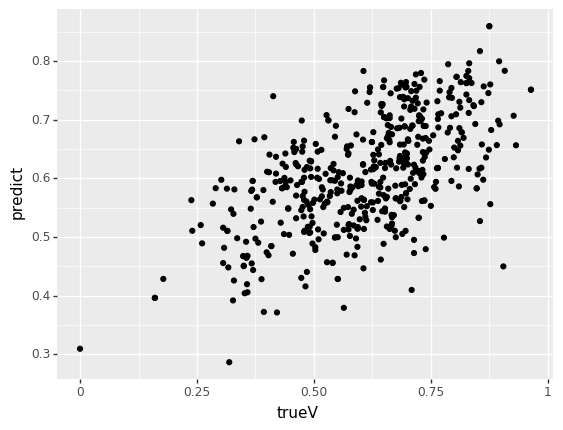

<ggplot: (8787579247026)>

In [14]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + geom_point())

# K Fold

In [15]:
kf = KFold(n_splits = 10)

In [16]:
X = m[predictors]
y = m["danceability"]

lr = LinearRegression()
mse = []
r2 = []

In [17]:
for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))
    r2.append(r2_score(y_test,model.predict(X_test)))
    

In [18]:
mse

[0.020930307424301006,
 0.02398415840437807,
 0.017611888653199907,
 0.014031482385972918,
 0.017964541727112288,
 0.021283298516371393,
 0.021093072207528905,
 0.007635165315696738,
 0.011737773142066496,
 0.011999264910150312]

In [19]:
np.mean(mse)

0.016827095268677806

In [20]:
r2

[-0.0026500320428106683,
 0.32289285991515637,
 0.39466086950544466,
 0.28631073738917756,
 0.2666614669225986,
 -0.01931044142466032,
 0.21743248871668797,
 0.26684400339532266,
 0.15093339176307585,
 0.1458587900640479]

In [21]:
np.mean(r2)

0.20296341342040405

# Leave One Out

In [22]:
loo = LeaveOneOut()

mse = []

In [23]:
for train,test in loo.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    model = lr.fit(X_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

In [24]:
np.mean(mse)

0.01577326185227478

# Quick Note about Data Leakage...

In [25]:
# Say you want to standardize...
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors], m["danceability"], test_size=0.2)

X_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
583,0.913,1,-5.795,1,0.4330,0.0352,0.000241,0.8630,0.217,391893
2031,0.164,6,-16.380,1,0.9120,0.8510,0.000000,0.1580,0.694,89626
274,0.854,5,-7.722,1,0.0489,0.0089,0.000000,0.9000,0.624,134866
1778,0.547,2,-4.948,1,0.0275,0.5210,0.000000,0.0728,0.238,251213
1814,0.339,4,-12.422,0,0.9260,0.9470,0.000000,0.1090,0.529,81004


In [26]:
zscore = StandardScaler()

In [27]:
zscore.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
Xz_train = zscore.transform(X_train)

In [29]:
Xz_test = zscore.transform(X_test) # DO NOT REFIT, I REPEAT DO NOT REFIT

In [30]:
# in KF
X = m[predictors]
y = m["danceability"]

lr = LinearRegression()

kf = KFold(5)

mse = []
r2 = []

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    z = StandardScaler()
    Xz_train = z.fit_transform(X_train)
    Xz_test = z.transform(X_test)
    
    # model
    model = lr.fit(Xz_train, y_train)
    # record accuracy
    mse.append(mean_squared_error(y_test, model.predict(Xz_test)))
    r2.append(r2_score(y_test,model.predict(Xz_test)))
    
print(np.mean(mse))
print(np.mean(r2))

0.017096654998859855
0.2608733282837334
